# Compare embeddings based on different peaks

In [1]:
import scanpy as sc
import muon as mu
from muon import atac as ac

# Cellranger Peaks

In [96]:
adata_cr = sc.read_h5ad("/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_cellranger_peaks.h5ad")

/Users/dominik.klein/opt/anaconda3/envs/mm_best_muon_full/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [97]:
adata_cr

AnnData object with n_obs × n_vars = 16978 × 228321
    obs: 'Row.names', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'sample', 'celltype_new'

In [98]:
ac.pp.tfidf(adata_cr)

In [101]:
sc.pp.normalize_per_cell(adata_cr, counts_per_cell_after=1e4)
sc.pp.log1p(adata_cr)

In [102]:
adata_cr

AnnData object with n_obs × n_vars = 16978 × 228321
    obs: 'Row.names', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'sample', 'celltype_new', 'n_counts'
    uns: 'log1p'

In [ ]:
sc.pp.neig

In [103]:
sc.tl.umap(adata_cr)

ValueError: Did not find .uns["neighbors"]. Run `sc.pp.neighbors` first.

In [89]:
ac.tl.lsi(adata_cr)


In [90]:
import numpy as np
corr_dict = {}
for i in range(10):
    corr_dict[i] = np.corrcoef(adata_cr.obs["nCount_ATAC"], adata_cr.obsm["X_lsi"][:,i])[0,1]

In [91]:
corr_dict

{0: 0.9647918864759694,
 1: 0.08137115299255418,
 2: -0.22481205961355985,
 3: 0.07222662541216968,
 4: 0.11062153178032601,
 5: -0.1407260933320549,
 6: -0.08014314134757801,
 7: -0.2554889398332017,
 8: -0.17848073188339336,
 9: -0.12987734997176467}

In [92]:
adata_cr.obsm["X_lsi_0"] = adata_cr.obsm["X_lsi"][:,1:]

In [68]:
sc.pp.neighbors(adata_cr, use_rep="X_lsi", key_added="X_lsi")

In [69]:
sc.tl.umap(adata_cr, neighbors_key="X_lsi")

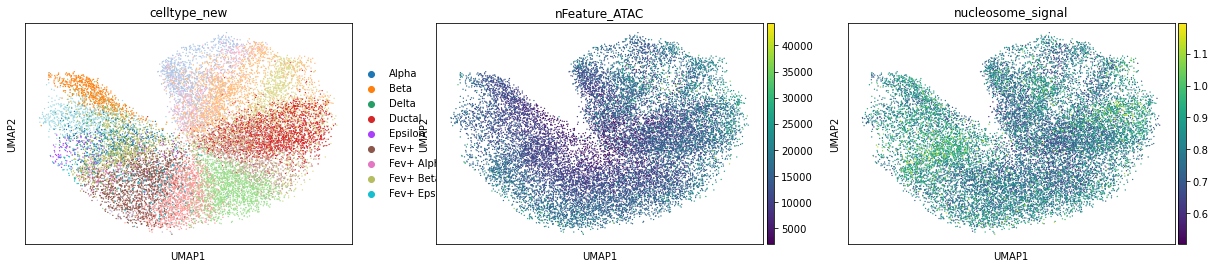

In [70]:
sc.pl.umap(adata_cr, color=["celltype_new", "nFeature_ATAC", 'nucleosome_signal'])

In [85]:
del adata_cr.obsm["X_umap"]
del adata_cr.obsm["X_lsi"]
del adata_cr.obsm["X_lsi_0"]

In [93]:
sc.pp.neighbors(adata_cr, use_rep="X_lsi_0", key_added="X_lsi_0")

In [94]:
sc.tl.umap(adata_cr, neighbors_key="X_lsi_0")

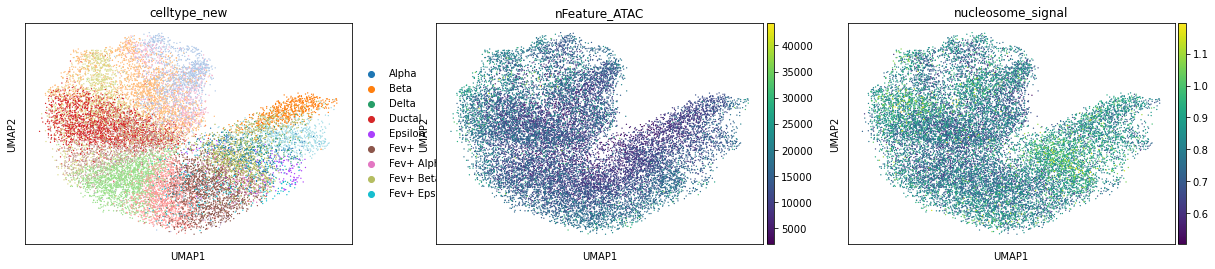

In [95]:
sc.pl.umap(adata_cr, color=["celltype_new", "nFeature_ATAC", 'nucleosome_signal'])

In [74]:
adata_cr

AnnData object with n_obs × n_vars = 16978 × 228321
    obs: 'Row.names', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'sample', 'celltype_new'
    uns: 'lsi', 'X_lsi', 'umap', 'celltype_new_colors', 'X_lsi_0'
    obsm: 'X_lsi', 'X_lsi_0', 'X_umap'
    varm: 'LSI'
    obsp: 'X_lsi_distances', 'X_lsi_connectivities', 'X_lsi_0_distances', 'X_lsi_0_connectivities'

In [78]:
(adata_cr.obsp["X_lsi_0_connectivities"] != adata_cr.obsp["X_lsi_connectivities"]).sum()

526758

# MACS 2 peaks

In [30]:
ls

[-0.6793261752110293,
 0.19070623218231952,
 0.1978378641258783,
 -0.14708209462395982,
 -0.5996788756271819,
 -0.06401131885146517,
 -0.08060936199917271,
 0.061254241211995665,
 -0.06596860506486528,
 -0.00018936338950468625]

In [31]:
adata_cr.obsm["X_lsi_remove_0"] = adata_cr.obsm["X_lsi"][:,1:]

In [57]:
adata_cr.obsm["X_lsi_remove_04"] = adata_cr.obsm["X_lsi"][:,[1,2,3]+list(range(5,50))]

In [42]:
sc.pp.neighbors(adata_cr, use_rep="X_lsi_remove_0")

In [44]:
sc.tl.umap(adata_cr)

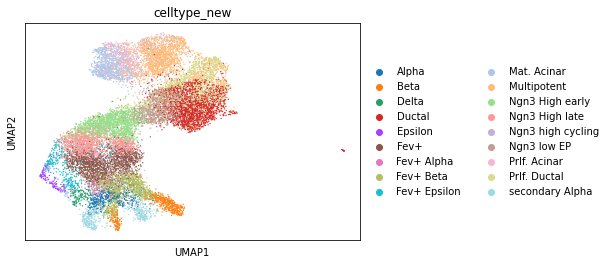

In [47]:
sc.pl.umap(adata_cr, color="celltype_new")

In [49]:
sc.pp.neighbors(adata_cr, use_rep="X_lsi")

In [50]:
sc.tl.umap(adata_cr)

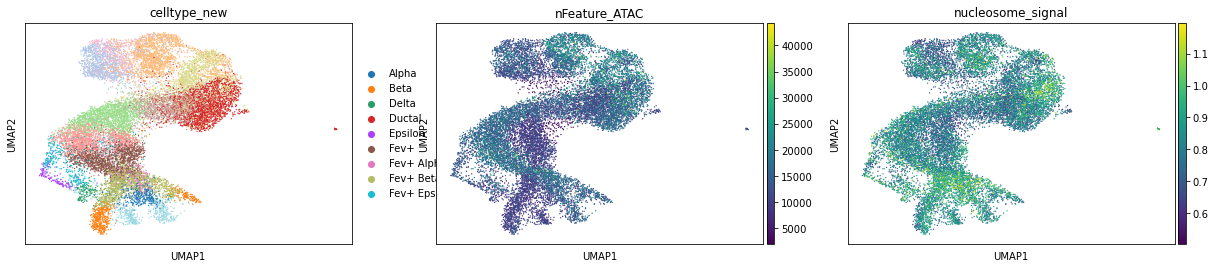

In [54]:
sc.pl.umap(adata_cr, color=["celltype_new", "nFeature_ATAC", 'nucleosome_signal'])

In [59]:
sc.pp.neighbors(adata_cr, use_rep="X_lsi_remove_04")


In [60]:
sc.tl.umap(adata_cr)

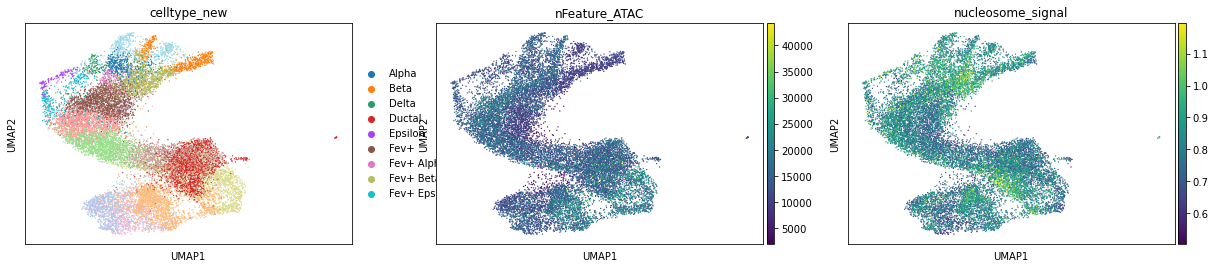

In [61]:
sc.pl.umap(adata_cr, color=["celltype_new", "nFeature_ATAC", 'nucleosome_signal'])